# Recursion examples

adopted from: https://github.com/rasbt/algorithms_in_ipython_notebooks

https://github.com/AbhishekSinhaCoder/Data-Structures-Concepts-through-Notebook

# Examples using Recursion

**Important Note**

For most cases, using function recursion should be avoided in Python are better be implemented using for/while loops most of the time (although, I must admit that recursive solutions do look elegant). One of the reasons is that stacking recursive calls can easily blow up memory or at least result in the popular yet nasty "RuntimeError: maximum recursion depth exceeded". Also, keep in mind that Python does not optimize tail recursion in favor of having the full tracebacks for debugging; related to that, please see Guido van Rossums blog posts "[Tail Recursion Elimination](http://neopythonic.blogspot.com.au/2009/04/tail-recursion-elimination.html)" and "[Final Words on Tail Calls](http://neopythonic.blogspot.com.au/2009/04/final-words-on-tail-calls.html)." If you do like to play around with recursion more efficiently, I highly recommend taking a look at [Haskell](https://www.haskell.org) or other functional programming languages. That being said, below are some examples of recursive function implementations in Python for illustrative purposes.

## Review: Running time and big-$\mathcal{O}$: Recursive Algorithms for Computing Powers

As example of the use of linear recursion, we consider the problem of raising a number $x$ to an arbitrary nonnegative integer, $n$. That is, we wish to compute the power function, defined as $power(x,n) = xn$. (We use the name “power” for this discussion, to differentiate from the built-in Python function _pow_ that provides such functionality.) We will consider two different recursive formulations for the problem that lead to algorithms with very different performance.
A trivial recursive definition follows from the fact that $x^n = x \cdot x^{n−1}$ for $n > 0$.


\begin{equation}
power(x,n) ==\left\{
                \begin{array}{ll}
                        1 \ if \ n = 0\\
                        x \ power(x, n − 1) \ otherwise.
                \end{array}
              \right.
\end{equation}

This definition leads to a recursive algorithm shown below:

In [ ]:
# in case we did not know about Pythons x**n statement :)

In [1]:
def basicpower(x, n):
    '''Compute the value x**n for integer n.''' 
    if n == 0:
        return 1 
    else:
        return x  * power(x, n-1)

A recursive call to this version of power(x,n) runs in $\mathcal{O}(n)$ time.

In [2]:

def power(x, n):
    '''Compute the value x**n for integer n.''' 
    if n == 0:
        return 1 
    else:
        partial = power(x, n // 2) 
        result = partial * partial
    if n % 2 == 1:
        result *= x 
    return result

To analyze the running time of the revised algorithm, we observe that the exponent in each recursive call of function power(x,n) is at most half of the preceding exponent. As we saw with the analysis of binary search, the number of times that we can divide $n$ in half before getting to one or less is $\mathcal{O}(log n)$. Therefore, our new formulation of the power function results in $\mathcal{O}(logn)$ recursive calls. Each individual activation of the function uses $\mathcal{O}(1)$ operations (excluding the recursive calls), and so the total number of operations for computing power(x,n) is O(logn). This is a significant improvement over the original $\mathcal{O}(n)$-time algorithm.

**Exercise:** Test the two functions with a timer and see the difference. Identify the base case and stopping conditions.

In [21]:
import time
def automatic_time(input_array, func_name):
    # input_array contains all elements of input,
    #   preferably sorted from small to big,
    #   each element could also be a tuple, which is requried
    #   for functions that need more than 1 input
    # func_name is the name of the function (as object, not str)
    # this function also suppresses printing output from the {func_name}
    ret = []
    for val in input_array:
#         print(time.process_time_ns())
#         start = time.process_time()
        start = time.time()
        from IPython.utils import io as iuio
        with iuio.capture_output() as suppressed:
            if isinstance(val, tuple):
                _ = func_name(*val)
            else:
                _ = func_name(val)
                
        ret.append((time.time() - start)) # 10e9 converts unit from second to nanosecond
    return ret

my_input_arr = [(10,200000),(2,100),(2,1000),(2,3000),(2,5000),(2,8000), (2,10000),(2,20000)]
print("testing function_1 with the automatic measure")
print(F"run-time for function 1 result in nanoseconds: \n{automatic_time(my_input_arr, basicpower)}")

testing function_1 with the automatic measure
run-time for function 1 result in nanoseconds: 
[0.6312243938446045, 0.0009701251983642578, 0.0, 0.0, 0.0, 0.0, 0.0009982585906982422, 0.0]


In [16]:
import matplotlib.pyplot as plt

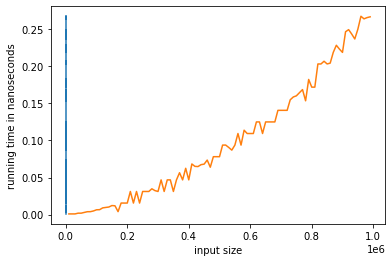

In [22]:
input_arr = [(11,i) for i in range(10_000, 1_000_000, 10_000)]

# input_arr_t = [(i,i) for i in range(1, 1000)]

# fun1 = automatic_time(input_arr, function_1)
fun2 = automatic_time(input_arr, basicpower)
# fun3 = automatic_time(input_arr, function_3)
# fun4 = automatic_time(input_arr_t, function_4)
# fun5 = automatic_time(input_arr_t, function_5)

plt.plot(input_arr, fun2)
plt.xlabel("input size")
plt.ylabel("running time in nanoseconds")
plt.show()

## Factorial

In [2]:
def factorial(x):
    if x <= 1:
        return 1 # not x! as factorial of 0 is considered 1!
    else:
        return x * factorial(x-1)

In [3]:
factorial(0)

0

In [4]:
factorial(1)

1

5! = 5 x 4 x 3 x 2 x 1 = 120

In [5]:
factorial(5)

120

# Exercise: Fibonacci

The sequence, in which each number is the sum of the two preceding numbers is known as the Fibonacci sequence: $1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, \cdots$ (each number is the sum of the previous two, e.g., $144=55 + 89$).

As you covered Fibonacci in Semester 1, this should be familiar. The twist is we are going to look at a variety of ways of implementing it and the complexity of execution for each.

A direct implementation of the description above would lead to pseudo code like this:

In [ ]:
def bad_fibonacci(n):
  """Return the nth Fibonacci number."""
  if n <= 1:
    return n
  else:
    return bad_fibonacci(n-2) + bad_fibonacci(n-1)

def good_fibonacci(n):
  """Return pair of Fibonacci numbers, F(n) and F(n-1)."""
  if n <= 1:
    return (n,0)
  else:
    (a, b) = good_fibonacci(n-1)
    return (a+b, a)

In [ ]:
## Fibonacci Solutions

1. timing

In [ ]:
%%time

bad_fibonacci(20)

In [ ]:
%%time

good_fibonacci(20)

In [ ]:
# 2. It is not tail recursive becuase there is something to do after returning the values (adding them together). We can use 2 accumulators to avoid this.

# Example: Binary Search

Binary search is a classic recursive algorithm to find a target value within a sorted sequence. This is among the most important of computer algorithms, and it is the reason that we so often store data in sorted order.

e.g. For the sorted sequence below stored in a Python list with indexes above:

<table>
<tr><th>0</th><th>1</th><th> 2</th><th>3</th><th>4</th><th> 5</th><th>6</th><th>7</th><th> 8</th><th>9</th><th>10</th><th> 11</th> </tr>
<tr><td>2</td><td>4</td><td> 5</td><td>6</td><td>8</td><td> 9</td><td>15</td><td>16</td><td> 17</td><td>22</td><td>30</td><td> 31</td> </tr>
</table>

If the sequence was unsorted a simple solution is a _sequential search algorithm_: use a loop to examine every element. You either reach the end of the list or find the target.

It is linear complexity, running in $\mathcal{O}(n)$ time as worst case it inspects every element in the sequence.

A sorted sequence allows a much faster approach. Think about how you would accomplish this task by hand: divide in two, and choose the middle digit as a candidate to compare to the target. Everything to the left of the candidate is lower than it and everything to the right is higher. Compare the target to the candidate and discard the left if the candidate is lower and the right if it is higher. Then repeat your _binary search_ algorithm. This is much more efficient, running in $\mathcal{O}($log$n$) time.

Review the iterative and recursive binary search algorithm implementations below.

In [ ]:
def binary_search_iterative(data, target):
  """Return True if target is found in the given Python list."""
  low = 0
  high = len(data)-1
  while low <= high:b
    mid = (low + high) // 2
    if target == data[mid]:         # found a match
      return True
    elif target < data[mid]:
      high = mid - 1                # only consider values left of mid
    else:
      low = mid + 1                 # only consider values right of mid
  return False                      # loop ended without success

In [ ]:
def binary_search(data, target, low, high):
  """Return True if target is found in indicated portion of a Python list.

  The search only considers the portion from data[low] to data[high] inclusive.
  """
  if low > high:
    return False                    # interval is empty; no match
  else:
    mid = (low + high) // 2
    if target == data[mid]:         # found a match
      return True
    elif target < data[mid]:
      # recur on the portion left of the middle
      return binary_search(data, target, low, mid - 1)
    else:
      # recur on the portion right of the middle
      return binary_search(data, target, mid + 1, high)

When a function makes two recursive calls, we say that it uses binary recursion. Clearly the binary_search above is a binary recursion. Drawing the English ruler and the bad fibonacci function are also examples of binary recursion.

In [ ]:
data=[2,4,5,6,8,9,15,16,17,22,30,31]

rec_ans = binary_search(data,5,0,len(data))
iter_ans = binary_search_iterative(data,100)

print(rec_ans,iter_ans)

## Length of an array

In [6]:
def array_len(x):
    if x == []:
        return 0
    else:
        return 1 + array_len(x[1:])

In [7]:
array_len([])

0

In [8]:
array_len([1, 2, 3])

3

## Sum of the elements in an array

In [9]:
def array_sum(x):
    if x == []:
        return 0
    else:
        return x[0] + array_sum(x[1:])

In [10]:
array_sum([])

0

In [11]:
array_sum([5])

5

In [12]:
array_sum([1, 2, 3, 4, 5])

15

## Binary search using recursion

In [13]:
def binary_search(array, value, min_idx=0, max_idx=None):
    
    if min_idx == max_idx:
        return None
    elif max_idx is None:
        max_idx = len(array)
    else:
        pass

    middle_idx = min_idx + (max_idx - min_idx) // 2

    if array[middle_idx] == value:
        return middle_idx
    elif array[middle_idx] < value:
        min_idx = middle_idx + 1
    else:
        max_idx = middle_idx
        
    return binary_search(array, value, min_idx, max_idx)

In [14]:
binary_search(array=[1, 2, 4, 7, 8, 10, 11],
                value=1)

0

In [15]:
binary_search(array=[1, 2, 4, 7, 8, 10, 11],
                value=2)

1

In [16]:
binary_search(array=[1, 2, 4, 7, 8, 10, 11],
                value=4)

2

In [17]:
binary_search(array=[1, 2, 4, 7, 8, 10, 11],
                value=11)

6

In [18]:
binary_search(array=[1, 2, 4, 7, 8, 10, 11],
                value=99)

## Quicksort

In [5]:
def quicksort(array):
    if len(array) < 2:
        return array
    else:
        pivot = array[0]
        smaller, bigger = [], []
        for ele in array[1:]:
            if ele <= pivot:
                smaller.append(ele)
            else:
                bigger.append(ele)
        return quicksort(smaller) + [pivot] + quicksort(bigger)

In [6]:
quicksort([])

[]

In [7]:
quicksort([5])

[5]

In [8]:
quicksort([5, 4])

[4, 5]

In [9]:
quicksort([1, 2, 7, 5, 4])

[1, 2, 4, 5, 7]

In [10]:
quicksort([5, 4, 3, 2])

[2, 3, 4, 5]